In [69]:
import os,re #importing os - operating system, re for regular expressions
import pandas as pd #to work on data manipulataions 
import numpy as np #to do numerical calliculations 
cwd = os.chdir('E:/VINOD KUMAR/Project_Guf_new/Train_Test_Data')
cwd #setting working directory
import nltk # to preprocess the text we use Natural language tool kit 
from nltk.tokenize import sent_tokenize,word_tokenize  # To break docment to sentences
import rtfConverter as rtf #user defined library to clear all meta data
# this is to make sure we get no unicode based errors
from __future__ import unicode_literals
from  collections import Counter  # To count the values in our dataframe
import time

In [70]:
# Stop deprecation warnings from being printed
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [71]:
# spacy
import spacy
import en_core_web_sm 
nlp2= en_core_web_sm.load()

In [72]:
import multiprocessing
pool = multiprocessing.Pool(processes=8)

In [73]:
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer,SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import cross_validation,linear_model
from sklearn.svm import LinearSVC,NuSVC
from sklearn.grid_search import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,classification_report

In [74]:
# read the files if exists in working directory
if (os.path.exists("Train_data.xlsx"))==True & (os.path.exists("Test_data.xlsx"))==True:
    print("Train,Test data file exists")
    #print("Files in directory are:",os.listdir(cwd))
    #reading training data into a dataframe using pandas
    actual_data=pd.read_excel("Train_data.xlsx")
    test_data=pd.read_excel("Test_data.xlsx")
       
else: 
    print("file not exists")
    print("Files in directory are:",os.listdir(cwd))

Train,Test data file exists


In [75]:
print(actual_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86554 entries, 0 to 86553
Data columns (total 16 columns):
FileID                  86554 non-null int64
clientid                86554 non-null int64
PID                     82817 non-null float64
SUMMARY                 83731 non-null object
DATA                    86554 non-null object
Categories1             86554 non-null object
Sub_categories1         86554 non-null object
Categories2             1 non-null object
Sub_categories2         0 non-null float64
Categories3             0 non-null float64
Sub_categories3         0 non-null float64
Categories4             0 non-null float64
Sub_categories4         0 non-null float64
Categories5             0 non-null float64
Sub_categories5         0 non-null float64
Previous_Appointment    86554 non-null object
dtypes: float64(8), int64(2), object(6)
memory usage: 10.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 16 columns):
FileID

In [76]:
print("No of missing values actual_data:",sum(actual_data.isnull().sum()), (actual_data.isnull().sum()))
print("No of missing values test_data:",sum(test_data.isnull().sum()),(test_data.isnull().sum()))

No of missing values actual_data: 698991 FileID                      0
clientid                    0
PID                      3737
SUMMARY                  2823
DATA                        0
Categories1                 0
Sub_categories1             0
Categories2             86553
Sub_categories2         86554
Categories3             86554
Sub_categories3         86554
Categories4             86554
Sub_categories4         86554
Categories5             86554
Sub_categories5         86554
Previous_Appointment        0
dtype: int64
No of missing values test_data: 14793 FileID                     0
clientid                   0
PID                        0
SUMMARY                   81
DATA                       0
Categories1                0
Sub_categories1            0
Categories2             1839
Sub_categories2         1839
Categories3             1839
Sub_categories3         1839
Categories4             1839
Sub_categories4         1839
Categories5             1839
Sub_categories5       

# We observed Train data has 10.6 MB data with 86554 rows and 16 columns, 
# Test data has 428 KB data, 3427 rows and 16 columns.
# We can observe that in "SUMMARY" column of train data has missing values
# We observe that 8 columns in both the tables doesn't have any value init so we can ignore them 

In [77]:
#Converting datatype of actual_data1 variables 
actual_data.SUMMARY =actual_data.SUMMARY.astype('str')
actual_data.DATA =actual_data.DATA.astype('str')
actual_data.Categories1=actual_data.Categories1.astype("category")
actual_data.Sub_categories1=actual_data.Sub_categories1.astype("category")
actual_data.Previous_Appointment=actual_data.Previous_Appointment.astype("category")

In [78]:
#Converting datatype of actual_data1 variables 
test_data.SUMMARY =test_data.SUMMARY.astype('str')
test_data.DATA =test_data.DATA.astype('str')
test_data.Categories1=test_data.Categories1.astype("category")
test_data.Sub_categories1=test_data.Sub_categories1.astype("category")
test_data.Previous_Appointment=test_data.Previous_Appointment.astype("category")

In [79]:
actual_data.head()

,FileID,clientid,PID,SUMMARY,DATA,Categories1,Sub_categories1,Categories2,Sub_categories2,Categories3,Sub_categories3,Categories4,Sub_categories4,Categories5,Sub_categories5,Previous_Appointment
0,92824,1004,1.750262e+15,nan,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,92825,1004,1.583836e+15,recurrent chest wall pain pneumonia symptoms,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,SYMPTOMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,92826,1004,1.583837e+15,nan,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,92827,1004,1.583837e+15,nan,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,92828,1004,1.583837e+15,nan,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [80]:
test_data.head()

,FileID,clientid,PID,SUMMARY,DATA,Categories1,Sub_categories1,Categories2,Sub_categories2,Categories3,Sub_categories3,Categories4,Sub_categories4,Categories5,Sub_categories5,Previous_Appointment
0,201291,1004,1694340834006680,BP concerns,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,APPOINTMENTS,NEW APPOINTMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,201292,1004,1583836598100010,S/e Cymbalta,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,201293,1004,1772030862984470,****Ask Dr. R-back pain what do you recommend?,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,201295,1004,1709735526006510,Sinus infection,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,SYMPTOMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,201298,1004,1583836937250010,FYI for Dr. Russo,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,SYMPTOMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


# We need to clean DATA,SUMMARY column to bulid our model - so we use NLTK,Regular expressions for cleaning

# Writen a function to call rtf file to extract data from meta data

In [81]:
#Fuction to extract text from rtf file 
def sentence_extraction(doc):
    text = rtf.striprtf(doc)
    return text

In [82]:
%time actual_data["extracted_train_doc"] = [sentence_extraction(actual_data.DATA[i]) for i in range(0,len(actual_data))]

Wall time: 51.1 s


In [83]:
%time test_data["extracted_test_doc"] = [sentence_extraction(test_data.DATA[i]) for i in range(0,len(test_data))]

Wall time: 1.12 s


In [84]:
print("No of missing values actual_data:",sum(actual_data.extracted_train_doc.isnull()))
print("No of missing values test_data:",sum(test_data.extracted_test_doc.isnull()))

No of missing values actual_data: 0
No of missing values test_data: 0


# for extracting original data from meta it took 50.2 secs for train data, 2.01 secs for test data 

In [107]:
actual_data["extracted_train_doc"][5500]

'Phone Note \nCall from Patient\nCall back at 693-9559\nCaller: Sherrie, wife\nInitial call taken by: Melissa Dykes CMA,  February 22, 2016 2:31 PM\nSummary of Call: He needs to be seen by Dr. Shaw.  He had cold/flu about a month ago.  He has had a chronic cough since.  He would like a 9 or 10:00 appt this week.  You can leave the appt info on my VM.  He does not want to see the NP again\n\n\nFollow-up for Phone Call \nMD Followup Details: Confirm that he is taking Dexilant (reflux related cough).  Ok to schedule OV with me when available.\n \nFollow-up by: William D Shaw MD,  February 22, 2016 3:07 PM\nClinical Followup Details: left message with wife, she will call husband and let me know......................................Kelly Sykes  CNA  February 22, 2016 3:18 PM \n\nwife said that she will get back in touch with us ......................................Kelly Sykes  CNA  February 23, 2016 1:44 PM \nAction Taken: Phone Call Completed\nFollow-up by: Kelly Sykes  CNA,  February 23,

In [86]:
%time test_data["extracted_test_doc"][2]

Wall time: 0 ns


"Phone Note \nCall from Patient\nCaller: Patient\nInitial call taken by: Ashley Cross, RN,  June  1, 2018 8:37 AM\nSummary of Call: Patient called and said he was lifting heavy bag of concrete on Monday and he is c/o back pain on left side in his lower back and muscle spasms and it hurts to inhale so he wants to know what we recommend? Patient said this has happend to before but it hasn't lasted this long and he been taking Ibuprofen and it has helped some and he wants to knwo what we recommend?\n\nNew Medications:\nCYCLOBENZAPRINE HCL 10 MG ORAL TABLET (CYCLOBENZAPRINE HCL) ONE PO BID prn\nNew Medications:\nCYCLOBENZAPRINE HCL 10 MG ORAL TABLET (CYCLOBENZAPRINE HCL) ONE PO BID prn\n\nFollow-up for Phone Call \nMD Followup Details: Can do heat, message, and we can call in Muscle Relaers.\nFlexeril 10 mg PO BID prn #14.\nIf does not help or he is in Sig pain - issues - then get seen\n \nFollow-up by: John M Russo MD,  June  1, 2018 10:22 AM\nClinical Followup Details: walgreens cornwali

In [24]:
clean_str2(actual_data["extracted_train_doc"][5000])

'Patient  Shanon Wright CMA   February                  At the audiologist and needs a referral Dr Steinmark Fax          Phone          New Problems Hearing loss    ICD             ICD   H         New Orders Consult Audiology Hearing Con AH New Problems Hearing loss    ICD             ICD   H         New Orders Consult Audiology Hearing Con AH'

In [25]:
clean_str2(actual_data["extracted_train_doc"][5000])

'Patient  Shanon Wright CMA   February                  At the audiologist and needs a referral Dr Steinmark Fax          Phone          New Problems Hearing loss    ICD             ICD   H         New Orders Consult Audiology Hearing Con AH New Problems Hearing loss    ICD             ICD   H         New Orders Consult Audiology Hearing Con AH'

In [26]:
print(actual_data["extracted_train_doc"][4550])

Phone Note 
Call from Patient
Call back at 394-4332
Caller: Patient
Initial call taken by: Amanda Gray,  February 12, 2016 11:20 AM
Summary of Call: I have lost control of my bladder. Incontience. It's every hour. 

New Medications:
CIPRO 250 MG ORAL TABS (CIPROFLOXACIN HCL) 1 po bid
New Medications:
CIPRO 250 MG ORAL TABS (CIPROFLOXACIN HCL) 1 po bid

Follow-up for Phone Call 
MD Followup Details: may leave sample in lab if wants.

okay to treat for uti.

cipro 250 mg one po bid #10
take align( over the counter) one daily for 2 weeks as a probiotic
keep hydrated.
thank you

 
Follow-up by: Mark A Perini MD,  February 12, 2016 11:27 AM
Clinical Followup Details: Patient was directly notified and RX was e-scribed/called to the pharmacy....................................Amanda Gray  February 12, 2016 11:43 AM 

New Medications:
CIPRO 250 MG ORAL TABS (CIPROFLOXACIN HCL) 1 po bid

 




In [27]:
# Seperating Names,Time, Days, Months, Years, Headers

In [28]:
actual_data["extracted_train_doc"][2]

'Phone Note \nCall from Patient\nInitial call taken by: John M Russo MD,  January  1, 2016 1:38 PM\nSummary of Call: called today c ST/cough, congestion, Head congestion, + fever, Severe nasal issues. Seems like Sinusitis.\nNot flu like\nCannot take mucinex for ??\nOK for plain old Guafen DM\n\n\n\nNew Medications:\nBENZONATATE 200 MG ORAL CAPS (BENZONATATE) one PO TID prn cough\nCEFDINIR 300 MG ORAL CAPS (CEFDINIR) one po BID\nNew Medications:\nBENZONATATE 200 MG ORAL CAPS (BENZONATATE) one PO TID prn cough\nCEFDINIR 300 MG ORAL CAPS (CEFDINIR) one po BID\n \nFollow-up by: John M Russo MD,  January  1, 2016 1:39 PM\n\nNew Medications:\nBENZONATATE 200 MG ORAL CAPS (BENZONATATE) one PO TID prn cough\nCEFDINIR 300 MG ORAL CAPS (CEFDINIR) one po BID\n\n \n\n'

In [29]:
clean_str2(actual_data["extracted_train_doc"][2])

'John M Russo MD   January                 called today c ST cough   congestion   Head congestion   fever   Severe nasal issues Seems like Sinusitis Not flu like Cannot take mucinex for       OK for plain old Guafen DM   BENZONATATE     MG ORAL CAPS    BENZONATATE    one PO TID prn cough CEFDINIR     MG ORAL CAPS    CEFDINIR    one po BID   BENZONATATE     MG ORAL CAPS    BENZONATATE    one PO TID prn cough CEFDINIR     MG ORAL CAPS    CEFDINIR    one po BID   John M Russo MD   January                  BENZONATATE     MG ORAL CAPS    BENZONATATE    one PO TID prn cough CEFDINIR     MG ORAL CAPS    CEFDINIR    one po BID'

In [30]:
d=(' '.join(map(str,nlp2((actual_data["extracted_train_doc"][2])).ents))).split(" ")
print(" ".join(d))

John M Russo MD  January  1, 2016 1:38 PM 
 Summary today Severe Sinusitis 
 
 
 Guafen DM New Medications 
 BENZONATATE 200 MG ORAL one PO TID 
 300 CAPS CEFDINIR one 
 BENZONATATE 200 MG ORAL one PO TID 
 300 CAPS CEFDINIR one John M Russo MD  January  1, 2016 1:39 PM 
 BENZONATATE 200 MG ORAL one PO TID 
 300 CAPS CEFDINIR one


In [31]:
d=(' '.join(map(str,nlp2(clean_str2(actual_data["extracted_train_doc"][2])).ents))).split(" ")
print(" ".join(d))

John M Russo January today            Severe Sinusitis Not        Guafen DM BENZONATATE MG ORAL one PO TID CEFDINIR     MG ORAL CAPS CEFDINIR one MG ORAL one PO TID CEFDINIR     MG ORAL CAPS CEFDINIR one John M Russo January                   BENZONATATE one PO TID CEFDINIR     MG ORAL CAPS CEFDINIR one


In [32]:
print(actual_data["extracted_train_doc"][2])
d=(' '.join(map(str,nlp2(clean_str2(actual_data["extracted_train_doc"][2])).ents))).split(" ")
print(" ".join(d))
word_tokens = word_tokenize(clean_str2(actual_data["extracted_train_doc"][2]))
word_tokens
filtered_sentence =[w for w in word_tokens if not w in d]
" ".join([w for w in word_tokens if not w in d])

Phone Note 
Call from Patient
Initial call taken by: John M Russo MD,  January  1, 2016 1:38 PM
Summary of Call: called today c ST/cough, congestion, Head congestion, + fever, Severe nasal issues. Seems like Sinusitis.
Not flu like
Cannot take mucinex for ??
OK for plain old Guafen DM



New Medications:
BENZONATATE 200 MG ORAL CAPS (BENZONATATE) one PO TID prn cough
CEFDINIR 300 MG ORAL CAPS (CEFDINIR) one po BID
New Medications:
BENZONATATE 200 MG ORAL CAPS (BENZONATATE) one PO TID prn cough
CEFDINIR 300 MG ORAL CAPS (CEFDINIR) one po BID
 
Follow-up by: John M Russo MD,  January  1, 2016 1:39 PM

New Medications:
BENZONATATE 200 MG ORAL CAPS (BENZONATATE) one PO TID prn cough
CEFDINIR 300 MG ORAL CAPS (CEFDINIR) one po BID

 


John M Russo January today            Severe Sinusitis Not        Guafen DM BENZONATATE MG ORAL one PO TID CEFDINIR     MG ORAL CAPS CEFDINIR one MG ORAL one PO TID CEFDINIR     MG ORAL CAPS CEFDINIR one John M Russo January                   BENZONATATE one 

'MD called c ST cough congestion Head congestion fever nasal issues Seems like flu like Can not take mucinex for OK for plain old prn cough po BID prn cough po BID MD prn cough po BID'

In [33]:
#spacy=[]
#for i in range (0,len(actual_data)):
#    if i%1000 == 0:
#        print ("no.of rows reviews processed:",i)
#    spacy.append(' '.join(map(str,nlp2(actual_data["extracted_train_doc"][i]).ents)))

In [34]:
#spacy_test=[]
#for i in range (0,len(test_data)):
#    if i%1000 == 0:
#        print ("no.of rows reviews processed:",i)
#    spacy_test.append(' '.join(map(str,nlp2(test_data["extracted_test_doc"][i]).ents)))

In [35]:
#%time actual_data["scapy"]=pd.DataFrame(spacy)
#%time test_data["scapy"]=pd.DataFrame(spacy_test)

In [36]:
import time
start = time.time()
spacy_sent=[]
for i in range (0,len(actual_data)):
    if i%10000 == 0:
        print ("no.of rows reviews processed:",i)
    d=(' '.join(map(str,nlp2(clean_str2(actual_data["extracted_train_doc"][i])).ents))).split(" ")
    word_tokens = word_tokenize(clean_str2(actual_data["extracted_train_doc"][i]))
    spacy_sent.append(" ".join([w for w in word_tokens if not w in d]))
print("Training took {:0.3f} seconds".format(time.time()-start))

no.of rows reviews processed: 0
no.of rows reviews processed: 10000
no.of rows reviews processed: 20000
no.of rows reviews processed: 30000
no.of rows reviews processed: 40000
no.of rows reviews processed: 50000
no.of rows reviews processed: 60000
no.of rows reviews processed: 70000
no.of rows reviews processed: 80000
Training took 1775.097 seconds


In [37]:
import time
start = time.time()
spacy_test_sent=[]
for i in range (0,len(test_data)):
    if i%1000 == 0:
        print ("no.of rows reviews processed:",i)
    d=(' '.join(map(str,nlp2(clean_str2(test_data["extracted_test_doc"][i])).ents))).split(" ")
    word_tokens = word_tokenize(clean_str2(test_data["extracted_test_doc"][i]))
    spacy_test_sent.append(" ".join([w for w in word_tokens if not w in d]))
print("Training took {:0.3f} seconds".format(time.time()-start))

no.of rows reviews processed: 0
no.of rows reviews processed: 1000
Training took 37.730 seconds


In [38]:
%time actual_data["spacy_sent"]=pd.DataFrame(spacy_sent)
%time test_data["spacy_test_sent"]=pd.DataFrame(spacy_test_sent)

Wall time: 18.1 ms
Wall time: 0 ns


In [39]:
%time actual_data["spacy_sent"]= actual_data["spacy_sent"].astype(str)
%time test_data["spacy_test_sent"]=test_data["spacy_test_sent"].astype(str)

Wall time: 31.2 ms
Wall time: 0 ns


In [40]:
actual_data["spacy_sent"][1000]

'We switched to She is out of her triam hctz TABS take TABS take Patient was directly notified and RX was e scribed called to the pharmacy TABS take'

In [41]:
#Combining SUMMARY column with Spacy_sentences
actual_data['combined_sent'] = actual_data['SUMMARY'].map(str) +" " +actual_data['spacy_sent']
test_data['combined_sent'] = test_data['SUMMARY'].map(str) +" " +test_data['spacy_test_sent']

In [42]:
actual_data['combined_sent'] = actual_data['combined_sent'].astype(str)
test_data['combined_sent'] = test_data['combined_sent'].astype(str)

In [43]:
actual_data['combined_sent'].head()

0    nan Some better c cough and congestion However...
1    recurrent chest wall pain pneumonia symptoms R...
2    nan MD called c ST cough congestion Head conge...
3    nan Needs something stronger for cough than OT...
4    nan MD She called to get refill on mg x for br...
Name: combined_sent, dtype: object

In [44]:
#%time actual_data.to_csv("actual_data_2.csv",index=False)
#%time test_data.to_csv("test_data_2.csv",index=False)

In [45]:
#Some Preprocessing
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

def raw_to_prepwithtokenize( raw_review ):
    review_text = BeautifulSoup(raw_review).get_text() 
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    low_case = letters_only.lower()
    words = nltk.word_tokenize(low_case)
    stops = set(stopwords.words("english")+["pm",'nan',"am","aa","trimethoprim","sulfamethoxanole",
                                            "fyi","january","february","march","april","may","june","july","august","september",
                                            "october","november","december"])                  
    meaningful_words = [w for w in words if not w in stops]   
    processed_sentence = " ".join(meaningful_words)
    return(processed_sentence)

In [46]:
process=[]
for i in range (0,len(actual_data)):
    if i%10000 == 0:
        print ("no.of rows reviews processed:",i)
    process.append(raw_to_prepwithtokenize(actual_data['combined_sent'][i]))

no.of rows reviews processed: 0


C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


no.of rows reviews processed: 10000
no.of rows reviews processed: 20000
no.of rows reviews processed: 30000
no.of rows reviews processed: 40000
no.of rows reviews processed: 50000
no.of rows reviews processed: 60000
no.of rows reviews processed: 70000
no.of rows reviews processed: 80000


In [47]:
process_test=[]
for i in range (0,len(test_data)):
    if i%1000 == 0:
        print ("no.of rows reviews processed:",i)
    process_test.append(raw_to_prepwithtokenize(test_data['combined_sent'][i]))

no.of rows reviews processed: 0


C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


no.of rows reviews processed: 1000


In [48]:
actual_data["processed_combined_sent"]=pd.DataFrame(process)
test_data["processed_combined_sent"]=pd.DataFrame(process_test)

In [49]:
actual_data["processed_combined_sent"][10000]

'r q lyrica cma reason details lot walking lot burning foot like try rx pregabalin po qhs pregabalin po qhs sound ok mg ref called patient notified patient rx called cma pregabalin po qhs'

In [50]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
words = stopwords.words("english")
actual_data['processed_combined_sent'] = actual_data['processed_combined_sent'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
test_data['processed_combined_sent'] = test_data['processed_combined_sent'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [51]:
actual_data['processed_combined_sent'].head()

0    better c cough congest howev still c low grade...
1    recurr chest wall pain pneumonia symptom ravis...
2    md call c st cough congest head congest fever ...
3    need someth stronger cough otc call cap po prn...
4    md call get refil mg x bronchiti cough congest...
Name: processed_combined_sent, dtype: object

In [52]:
len(actual_data['combined_sent'])

86554

In [53]:
#Each word frequency count in Whole Corpus
freq_count_data = pd.Series(' '.join(actual_data["processed_combined_sent"]).split()).value_counts()
len(freq_count_data)

27733

In [54]:
freq_count_data

patient       96281
call          90555
cma           68592
take          66513
need          65128
pt            61733
dr            49896
tab           39346
said          33541
want          33370
rx            31953
back          31021
get           30418
notifi        30105
appt          30047
mouth         29113
mg            27170
tablet        25880
pain          24156
x             23784
know          22878
see           22821
would         21697
advis         20872
day           20696
cough         19565
refil         18819
done          18819
go            18811
n             18461
              ...  
longt             1
plea              1
dehydar           1
junamet           1
meantin           1
senario           1
atena             1
amlopidin         1
amioradon         1
snowi             1
theshold          1
bisacodyl         1
affor             1
disfigur          1
boht              1
abe               1
evalatuion        1
cefdiniur         1
hpc               1


In [55]:
freq_count_data.describe()

count    27733.000000
mean       129.330112
std       1527.201430
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max      96281.000000
dtype: float64

ASK_A_DOCTOR     31337
PRESCRIPTION     21490
APPOINTMENTS     19477
MISCELLANEOUS    10848
LAB               3402
Name: Categories1, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


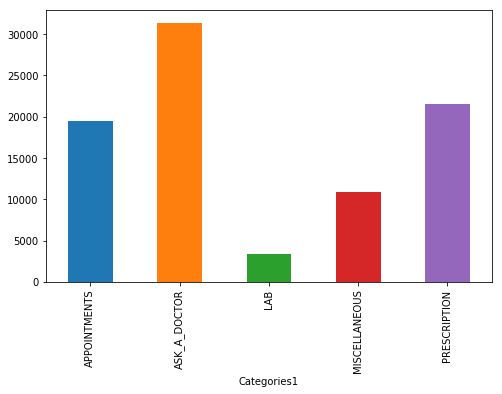

In [56]:
ax = actual_data.groupby("Categories1").size().plot(kind="bar", figsize=(8, 5))
print(actual_data.Categories1.value_counts(),ax)

In [57]:
train_data=actual_data[['processed_combined_sent',"Categories1"]]

In [58]:
len(train_data)

86554

# Train_Test_split

In [59]:
#train and test split
train_x, valid_x, train_y, valid_y = cross_validation.train_test_split(train_data["processed_combined_sent"], train_data['Categories1'],test_size=0.10, random_state=42)

In [60]:
test_x=test_data['processed_combined_sent']
test_y=test_data["Categories1"]
test_2y=test_data["Sub_categories1"]

In [61]:
len(train_x),len(valid_x),len(test_x)

(77898, 8656, 1839)

# TFIDF Vectorizer

In [62]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=100000)
tfidf_vect_ngram.fit(train_x)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)
xtest_tfidf_ngram = tfidf_vect_ngram.transform(test_x)

# Random_forest_Chisqure test

In [63]:
ch2_train= []
ch2_valid = []
ch2_test = []
for n in np.arange(10000,100000,10000):
    ch1 = SelectKBest(chi2, k=n)
    x_train_chi1_kbest = ch1.fit_transform(xtrain_tfidf_ngram,train_y)
    x_validation_chi1_kbest = ch1.transform(xvalid_tfidf_ngram)
    x_test_chi1_kbest = ch1.transform(xtest_tfidf_ngram)
    
    
    clf =  OneVsRestClassifier(RandomForestClassifier())
   
    clf.fit(x_train_chi1_kbest, train_y)
    
    score_train = clf.score(x_train_chi1_kbest, train_y)
    score_valid = clf.score(x_validation_chi1_kbest, valid_y)
    score_test = clf.score(x_test_chi1_kbest, test_y)
    
    ch2_train.append(score_train)
    ch2_valid.append(score_valid)
    ch2_test.append(score_test)
    
    print ("chi2 feature selection evaluation calculated for {} features".format(n),score_train,score_valid,score_test)  

chi2 feature selection evaluation calculated for 10000 features 0.998356825592 0.756816081331 0.752039151713
chi2 feature selection evaluation calculated for 20000 features 0.998215615292 0.762823475046 0.73844480696
chi2 feature selection evaluation calculated for 30000 features 0.998164266092 0.756931608133 0.73898858075
chi2 feature selection evaluation calculated for 40000 features 0.998202777992 0.755314232902 0.740619902121
chi2 feature selection evaluation calculated for 50000 features 0.998343988292 0.760512939002 0.7362697118
chi2 feature selection evaluation calculated for 60000 features 0.998652083494 0.757971349353 0.73681348559
chi2 feature selection evaluation calculated for 70000 features 0.998356825592 0.754621072089 0.729744426319
chi2 feature selection evaluation calculated for 80000 features 0.998369662893 0.748267097967 0.719412724307
chi2 feature selection evaluation calculated for 90000 features 0.998472361293 0.749884473198 0.73735725938


In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
'''
ch2_train= []
ch2_valid = []
ch2_test = []
for n in np.arange(10000,100000,10000):
    ch1 = SelectKBest(chi2, k=n)
    x_train_chi1_kbest = ch1.fit_transform(xtrain_tfidf_ngram,train_y)
    x_validation_chi1_kbest = ch1.transform(xvalid_tfidf_ngram)
    x_test_chi1_kbest = ch1.transform(xtest_tfidf_ngram)
    
    
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
                   'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
    #pprint(random_grid)
    
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    #rf_random.fit(train_features, train_labels)
    
    #clf =  OneVsRestClassifier(RandomForestClassifier())
   
    clf.fit(x_train_chi1_kbest, train_y)
    rf_random.best_params_
    score_train = clf.score(x_train_chi1_kbest, train_y)
    score_valid = clf.score(x_validation_chi1_kbest, valid_y)
    score_test = clf.score(x_test_chi1_kbest, test_y)
    
    ch2_train.append(score_train)
    ch2_valid.append(score_valid)
    ch2_test.append(score_test)
    
    print ("chi2 feature selection evaluation calculated for {} features".format(n),score_train,score_valid,score_test)  
    
'''

In [161]:
'''
#ch2_train= []
#ch2_valid = []
#ch2_test = []
ch1 = SelectKBest(chi2, k=10000)
x_train_chi1_kbest = ch1.fit_transform(xtrain_tfidf_ngram,train_y)
x_validation_chi1_kbest = ch1.transform(xvalid_tfidf_ngram)
x_test_chi1_kbest = ch1.transform(xtest_tfidf_ngram)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
print(random_grid)
    
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf = OneVsRestClassifier(RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1))
# Fit the random search model
#rf_random.fit(train_features, train_labels)
#clf =  OneVsRestClassifier(RandomForestClassifier())
   
clf.fit(x_train_chi1_kbest, train_y)
clf.best_params_

#score_train = clf.score(x_train_chi1_kbest, train_y)
#score_valid = clf.score(x_validation_chi1_kbest, valid_y)
#score_test = clf.score(x_test_chi1_kbest, test_y)
    
#ch2_train.append(score_train)
#ch2_valid.append(score_valid)
#ch2_test.append(score_test)
    
#print ("chi2 feature selection evaluation calculated for {} features".format(n),score_train,score_valid,score_test)  
#print(rf_random.cv_results_)
'''


'\n#ch2_train= []\n#ch2_valid = []\n#ch2_test = []\nch1 = SelectKBest(chi2, k=10000)\nx_train_chi1_kbest = ch1.fit_transform(xtrain_tfidf_ngram,train_y)\nx_validation_chi1_kbest = ch1.transform(xvalid_tfidf_ngram)\nx_test_chi1_kbest = ch1.transform(xtest_tfidf_ngram)\n\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = [\'auto\', \'sqrt\']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {\'n_estimators\': n_estimators,\'max_features\': max_features,\'max_depth\': max_depth,\n               \'min

In [ ]:
'''
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
'''

In [ ]:
import pickle
# save the model to disk
best_random = clf.best_estimator_
filename = 'finalized_model.sav'
pickle.dump(best_random, open(filename, 'wb'))

# Evaluate the Best Random Search Model

In [ ]:
best_random = clf.best_estimator_
random_accuracy = evaluate(best_random, x_train_chi1_kbest, train_y)

In [ ]:
best_random = clf.best_estimator_
random_accuracy = evaluate(best_random, x_test_chi1_kbest, test_y)

In [ ]:

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test_chi1_kbest, test_y)
print(result)


In [220]:
linear_model.LogisticRegression(solver=newton-cg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
ch2_train= []
ch2_valid = [] 
ch2_test = []
for n in np.arange(10000,100000,10000):
    ch1 = SelectKBest(chi2, k=n)
    x_train_chi1_kbest = ch1.fit_transform(xtrain_tfidf_ngram,train_y)
    x_validation_chi1_kbest = ch1.transform(xvalid_tfidf_ngram)
    x_test_chi1_kbest = ch1.transform(xtest_tfidf_ngram)
    
    
    clf =  linear_model.LogisticRegression(penalty='l2',n_jobs=-1,multi_class='ovr',C=1.0,class_weight="balanced",max_iter=4000,solver='newton-cg')
   
    clf.fit(x_train_chi1_kbest, train_y)
    
    score_train = clf.score(x_train_chi1_kbest, train_y)
    score_valid = clf.score(x_validation_chi1_kbest, valid_y)
    score_test = clf.score(x_test_chi1_kbest, test_y)
    
    ch2_train.append(score_train)
    ch2_valid.append(score_valid)
    ch2_test.append(score_test)
    
    print ("chi2 feature selection evaluation calculated for {} features".format(n),score_train,score_valid,score_test)  

chi2 feature selection evaluation calculated for 10000 features 0.808351947418 0.785235674677 0.754758020663
chi2 feature selection evaluation calculated for 20000 features 0.819045418368 0.78696857671 0.764002175095
chi2 feature selection evaluation calculated for 30000 features 0.827043056304 0.787892791128 0.772158781947
chi2 feature selection evaluation calculated for 40000 features 0.832896865131 0.78800831793 0.768896139206
chi2 feature selection evaluation calculated for 50000 features 0.837762201854 0.789163585952 0.769439912996
chi2 feature selection evaluation calculated for 60000 features 0.841562042671 0.787777264325 0.769439912996
chi2 feature selection evaluation calculated for 70000 features 0.844553133585 0.788585951941 0.768352365416
chi2 feature selection evaluation calculated for 80000 features 0.847441526098 0.78800831793 0.767264817836
chi2 feature selection evaluation calculated for 90000 features 0.849084700506 0.787892791128 0.767808591626


In [65]:
ch2_train= []
ch2_valid = []
ch2_test = []
for n in np.arange(10000,100000,10000):
    ch1 = SelectKBest(chi2, k=n)
    x_train_chi1_kbest = ch1.fit_transform(xtrain_tfidf_ngram,train_y)
    x_validation_chi1_kbest = ch1.transform(xvalid_tfidf_ngram)
    x_test_chi1_kbest = ch1.transform(xtest_tfidf_ngram)
    
    
    clf =  linear_model.LogisticRegression(penalty='l2',n_jobs=-1,multi_class='ovr',C=1.0,class_weight="balanced",max_iter=4000,solver='saga')
   
    clf.fit(x_train_chi1_kbest, train_y)
    
    score_train = clf.score(x_train_chi1_kbest, train_y)
    score_valid = clf.score(x_validation_chi1_kbest, valid_y)
    score_test = clf.score(x_test_chi1_kbest, test_y)
    
    ch2_train.append(score_train)
    ch2_valid.append(score_valid)
    ch2_test.append(score_test)
    
    print ("chi2 feature selection evaluation calculated for {} features".format(n),score_train,score_valid,score_test)  

C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


chi2 feature selection evaluation calculated for 10000 features 0.801535341087 0.778766173752 0.747145187602
chi2 feature selection evaluation calculated for 20000 features 0.812613931038 0.78280961183 0.754214246873
chi2 feature selection evaluation calculated for 30000 features 0.821060874477 0.782116451017 0.770527460576
chi2 feature selection evaluation calculated for 40000 features 0.819674446071 0.778419593346 0.756389342034
chi2 feature selection evaluation calculated for 50000 features 0.823782382089 0.77969038817 0.753126699293
chi2 feature selection evaluation calculated for 60000 features 0.829584841716 0.77865064695 0.755301794454
chi2 feature selection evaluation calculated for 70000 features 0.83478394824 0.781654343808 0.755845568244
chi2 feature selection evaluation calculated for 80000 features 0.841587717271 0.784773567468 0.762370853725
chi2 feature selection evaluation calculated for 90000 features 0.837672340753 0.779112754159 0.758020663404


In [66]:
ch2_train= []
ch2_valid = []
ch2_test = []
for n in np.arange(10000,100000,10000):
    ch1 = SelectKBest(chi2, k=n)
    x_train_chi1_kbest = ch1.fit_transform(xtrain_tfidf_ngram,train_y)
    x_validation_chi1_kbest = ch1.transform(xvalid_tfidf_ngram)
    x_test_chi1_kbest = ch1.transform(xtest_tfidf_ngram)
    
    
    clf =  linear_model.LogisticRegression(n_jobs=-1,multi_class='ovr',C=1.0,max_iter=3000)
   
    clf.fit(x_train_chi1_kbest, train_y)
    
    score_train = clf.score(x_train_chi1_kbest, train_y)
    score_valid = clf.score(x_validation_chi1_kbest, valid_y)
    score_test = clf.score(x_test_chi1_kbest, test_y)
    
    ch2_train.append(score_train)
    ch2_valid.append(score_valid)
    ch2_test.append(score_test)
    
    print ("chi2 feature selection evaluation calculated for {} features".format(n),score_train,score_valid,score_test)  

C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


chi2 feature selection evaluation calculated for 10000 features 0.811895042235 0.79008780037 0.772702555737
chi2 feature selection evaluation calculated for 20000 features 0.821253433978 0.790318853974 0.769983686786
chi2 feature selection evaluation calculated for 30000 features 0.826568076202 0.789279112754 0.769983686786
chi2 feature selection evaluation calculated for 40000 features 0.831189504223 0.789510166359 0.773246329527
chi2 feature selection evaluation calculated for 50000 features 0.83487380934 0.789741219963 0.771615008157
chi2 feature selection evaluation calculated for 60000 features 0.837826388354 0.788932532348 0.771615008157
chi2 feature selection evaluation calculated for 70000 features 0.840111427765 0.789394639556 0.772158781947
chi2 feature selection evaluation calculated for 80000 features 0.842229582274 0.789972273567 0.772158781947
chi2 feature selection evaluation calculated for 90000 features 0.843808570182 0.789741219963 0.772702555737


In [67]:
ch2_train= []
ch2_valid = []
ch2_test = []
for n in np.arange(10000,100000,10000):
    ch1 = SelectKBest(chi2, k=n)
    x_train_chi1_kbest = ch1.fit_transform(xtrain_tfidf_ngram,train_y)
    x_validation_chi1_kbest = ch1.transform(xvalid_tfidf_ngram)
    x_test_chi1_kbest = ch1.transform(xtest_tfidf_ngram)
    
    
    clf = LinearSVC(C=1.0,penalty='l1', max_iter=3000,dual=False)
   
    clf.fit(x_train_chi1_kbest, train_y)
    
    score_train = clf.score(x_train_chi1_kbest, train_y)
    score_valid = clf.score(x_validation_chi1_kbest, valid_y)
    score_test = clf.score(x_test_chi1_kbest, test_y)
    
    
    ch2_train.append(score_train)
    ch2_valid.append(score_valid)
    ch2_test.append(score_test)
    print ("chi2 feature selection evaluation calculated for {} features".format(n),score_train,score_valid,score_test)  

chi2 feature selection evaluation calculated for 10000 features 0.837081824951 0.791012014787 0.771071234367
chi2 feature selection evaluation calculated for 20000 features 0.859418727053 0.790203327172 0.771615008157
chi2 feature selection evaluation calculated for 30000 features 0.872410074713 0.789394639556 0.775421424687
chi2 feature selection evaluation calculated for 40000 features 0.881370510154 0.790896487985 0.767808591626
chi2 feature selection evaluation calculated for 50000 features 0.887647949883 0.788817005545 0.762370853725
chi2 feature selection evaluation calculated for 60000 features 0.892307889805 0.788817005545 0.761827079935
chi2 feature selection evaluation calculated for 70000 features 0.895542889419 0.786853049908 0.761827079935
chi2 feature selection evaluation calculated for 80000 features 0.897532670929 0.786390942699 0.765089722675
chi2 feature selection evaluation calculated for 90000 features 0.898906262035 0.787661737523 0.764545948885


In [56]:
%time print ("\ntrain_results:",ch2_train,"\nvalid_results:",ch2_valid,"\ntest_results:",ch2_test)


train_results: [0.84128359545369202, 0.86244096876218534, 0.87493320624467452, 0.88309287581416174, 0.8885663532775876, 0.89227791978972604, 0.89494967000274395, 0.89682711609837817, 0.89808356079314877] 
valid_results: [0.79244411068106979, 0.78816937207555893, 0.78597423603489114, 0.7863786032002773, 0.78562763560741722, 0.78533880191785566, 0.78447230084917108, 0.78504996822829409, 0.78585870255906654] 
test_results: [0.77969069156696824, 0.77152028012839213, 0.77239568135395387, 0.77443828421359795, 0.77414648380507733, 0.7758972862562008, 0.77239568135395387, 0.77239568135395387, 0.77122847971987163]
Wall time: 15.6 ms


In [68]:
ch2_train= []
ch2_valid = []
ch2_test = []
ch1 = SelectKBest(chi2, k=30000)
x_train_chi1_kbest = ch1.fit_transform(xtrain_tfidf_ngram,train_y)
x_validation_chi1_kbest = ch1.transform(xvalid_tfidf_ngram)
x_test_chi1_kbest = ch1.transform(xtest_tfidf_ngram)
    
    
clf_svc = LinearSVC(C=1.0,penalty='l1', max_iter=3000,dual=False)
clf_rnd = OneVsRestClassifier(RandomForestClassifier(bootstrap=False,criterion='gini', n_estimators=2000,max_features='auto',n_jobs=-1,class_weight="balanced_subsample"))
clf_nvb = MultinomialNB()
clf_log = linear_model.LogisticRegression(n_jobs=-1,multi_class='ovr',C=1.0,class_weight="balanced",max_iter=3000)
   
clf_svc.fit(x_train_chi1_kbest, train_y)
clf_rnd.fit(x_train_chi1_kbest, train_y)
clf_nvb.fit(x_train_chi1_kbest, train_y)
clf_log.fit(x_train_chi1_kbest, train_y)

score_train_clf_svc = clf_svc.score(x_train_chi1_kbest, train_y)
score_valid_clf_svc = clf_svc.score(x_validation_chi1_kbest, valid_y)
score_test_clf_svc = clf_svc.score(x_test_chi1_kbest, test_y)

score_train_clf_rnd = clf_rnd.score(x_train_chi1_kbest, train_y)
score_valid_clf_rnd = clf_rnd.score(x_validation_chi1_kbest, valid_y)
score_test_clf_rnd = clf_rnd.score(x_test_chi1_kbest, test_y)

score_train_clf_nvb = clf_nvb.score(x_train_chi1_kbest, train_y)
score_valid_clf_nvb = clf_nvb.score(x_validation_chi1_kbest, valid_y)
score_test_clf_nvb = clf_nvb.score(x_test_chi1_kbest, test_y)

score_train_clf_log = clf_log.score(x_train_chi1_kbest, train_y)
score_valid_clf_log = clf_log.score(x_validation_chi1_kbest, valid_y)
score_test_clf_log = clf_log.score(x_test_chi1_kbest, test_y)

test_pred_clf_svc=clf_svc.predict(x_test_chi1_kbest)
test_pred_clf_rnd=clf_rnd.predict(x_test_chi1_kbest)
test_pred_clf_nvb=clf_nvb.predict(x_test_chi1_kbest)
test_pred_clf_log=clf_log.predict(x_test_chi1_kbest)    

print("LinearSVC(C=1.0,penalty='l1', max_iter=3000,dual=False) : \t",score_train_clf_svc,score_valid_clf_svc,score_test_clf_svc,
    "\nOneVsRestClassifier(RandomForestClassifier())           : \t",score_train_clf_rnd,score_valid_clf_rnd,score_test_clf_rnd,
    "\nnaive_bayes.MultinomialNB()                             : \t",score_train_clf_nvb,score_valid_clf_nvb,score_test_clf_nvb,
    "\nlinear_model.LogisticRegression                         : \t",score_train_clf_log,score_valid_clf_log,score_test_clf_log)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-68-5f09196be114>", line 16, in <module>
    clf_rnd.fit(x_train_chi1_kbest, train_y)
  File "C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\multiclass.py", line 215, in fit
    for i, column in enumerate(columns))
  File "C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 779, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 625, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 588, in _dispatch
    job = self._backend.appl

KeyboardInterrupt: 

# Results based on clean headers + Scapy ents removed 10000 features_TFIDF_chi2,selectbest
LinearSVC(C=1.0,penalty='l1', max_iter=3000,dual=False) : 	 0.839738312898 0.785049968228 0.771520280128 
OneVsRestClassifier(RandomForestClassifier())           : 	 0.998498043123 0.758535035527 0.732419025387 
naive_bayes.MultinomialNB()                             : 	 0.76377395549 0.744786551903 0.718412605778 
linear_model.LogisticRegression                         : 	 0.809049290181 0.782161631333 0.758389261745

# Results based on removed_scapy ents _ 10000 features_TFIDF_chi2,selectbest
LinearSVC(C=1.0,penalty='l1', max_iter=3000,dual=False) : 	 0.84131247924 0.792444110681 0.779690691567 
OneVsRestClassi#fier(RandomForestClassifier())           : 	 0.998108112011 0.762001039801 0.735045229063 
naive_bayes.MultinomialNB()                             : 	 0.760105714657 0.742129281959 0.720455208637 
linear_model.LogisticRegression                         : 	 0.810738991667 0.78360579978 0.763058068281

In [198]:
pd.DataFrame((confusion_matrix(clf_svc.predict(x_train_chi1_kbest),train_y)),["APPOINTMENTS","ASK_A_DOCTOR","LAB","MISCELLANEOUS","PRESCRIPTION"],["APPOINTMENTS","ASK_A_DOCTOR","LAB","MISCELLANEOUS","PRESCRIPTION"])

,APPOINTMENTS,ASK_A_DOCTOR,LAB,MISCELLANEOUS,PRESCRIPTION
APPOINTMENTS,13825,1326,69,304,113
ASK_A_DOCTOR,1373,21502,335,1291,2651
LAB,43,166,2215,72,24
MISCELLANEOUS,260,597,68,6577,381
PRESCRIPTION,93,1499,26,406,14027


In [199]:
pd.DataFrame((confusion_matrix(clf_rnd.predict(x_train_chi1_kbest),train_y)),["APPOINTMENTS","ASK_A_DOCTOR","LAB","MISCELLANEOUS","PRESCRIPTION"],["APPOINTMENTS","ASK_A_DOCTOR","LAB","MISCELLANEOUS","PRESCRIPTION"])

,APPOINTMENTS,ASK_A_DOCTOR,LAB,MISCELLANEOUS,PRESCRIPTION
APPOINTMENTS,15579,12,0,2,1
ASK_A_DOCTOR,9,25043,0,10,11
LAB,0,1,2710,0,0
MISCELLANEOUS,1,8,2,8627,4
PRESCRIPTION,5,26,1,11,17180


In [96]:
pd.DataFrame((confusion_matrix(clf_nvb.predict(x_train_chi1_kbest),train_y)),["APPOINTMENTS","ASK_A_DOCTOR","LAB","MISCELLANEOUS","PRESCRIPTION"],["APPOINTMENTS","ASK_A_DOCTOR","LAB","MISCELLANEOUS","PRESCRIPTION"])

,APPOINTMENTS,ASK_A_DOCTOR,LAB,MISCELLANEOUS,PRESCRIPTION
APPOINTMENTS,13735,2538,135,610,158
ASK_A_DOCTOR,1294,19922,590,1734,4573
LAB,30,178,1672,73,18
MISCELLANEOUS,445,916,276,5872,1016
PRESCRIPTION,90,1536,40,361,11431


In [97]:
pd.DataFrame((confusion_matrix(clf_log.predict(x_train_chi1_kbest),train_y)),["APPOINTMENTS","ASK_A_DOCTOR","LAB","MISCELLANEOUS","PRESCRIPTION"],["APPOINTMENTS","ASK_A_DOCTOR","LAB","MISCELLANEOUS","PRESCRIPTION"])

,APPOINTMENTS,ASK_A_DOCTOR,LAB,MISCELLANEOUS,PRESCRIPTION
APPOINTMENTS,13646,1746,40,317,133
ASK_A_DOCTOR,1167,19472,141,849,2571
LAB,185,578,2448,223,85
MISCELLANEOUS,481,1338,73,6915,750
PRESCRIPTION,115,1956,11,346,13657


In [ ]:
ch2_train= []
ch2_valid = []
ch2_test = []
ch1 = SelectKBest(chi2, k=30000)
x_train_chi1_kbest = ch1.fit_transform(xtrain_tfidf_ngram,train_y)
x_validation_chi1_kbest = ch1.transform(xvalid_tfidf_ngram)
x_test_chi1_kbest = ch1.transform(xtest_tfidf_ngram)
    
    
clf_svc = OneVsRestClassifier(LinearSVC(C=1.0,penalty='l1', max_iter=3000,dual=False))
clf_rnd =OneVsRestClassifier(RandomForestClassifier())
clf_nvb = OneVsRestClassifier(MultinomialNB())
clf_log = OneVsRestClassifier(linear_model.LogisticRegression(n_jobs=-1,multi_class='ovr',C=1.0,class_weight="balanced",max_iter=3000))
   
clf_svc.fit(x_train_chi1_kbest, train_y)
clf_rnd.fit(x_train_chi1_kbest, train_y)
clf_nvb.fit(x_train_chi1_kbest, train_y)
clf_log.fit(x_train_chi1_kbest, train_y)

score_train_clf_svc = clf_svc.score(x_train_chi1_kbest, train_y)
score_valid_clf_svc = clf_svc.score(x_validation_chi1_kbest, valid_y)
score_test_clf_svc = clf_svc.score(x_test_chi1_kbest, test_y)

score_train_clf_rnd = clf_rnd.score(x_train_chi1_kbest, train_y)
score_valid_clf_rnd = clf_rnd.score(x_validation_chi1_kbest, valid_y)
score_test_clf_rnd = clf_rnd.score(x_test_chi1_kbest, test_y)

score_train_clf_nvb = clf_nvb.score(x_train_chi1_kbest, train_y)
score_valid_clf_nvb = clf_nvb.score(x_validation_chi1_kbest, valid_y)
score_test_clf_nvb = clf_nvb.score(x_test_chi1_kbest, test_y)

score_train_clf_log = clf_log.score(x_train_chi1_kbest, train_y)
score_valid_clf_log = clf_log.score(x_validation_chi1_kbest, valid_y)
score_test_clf_log = clf_log.score(x_test_chi1_kbest, test_y)

test_pred_clf_svc=clf_svc.predict(x_test_chi1_kbest)
test_pred_clf_rnd=clf_rnd.predict(x_test_chi1_kbest)
test_pred_clf_nvb=clf_nvb.predict(x_test_chi1_kbest)
test_pred_clf_log=clf_log.predict(x_test_chi1_kbest)    

print("LinearSVC(C=1.0,penalty='l1', max_iter=3000,dual=False) : \t",score_train_clf_svc,score_valid_clf_svc,score_test_clf_svc,
    "\nOneVsRestClassifier(RandomForestClassifier())           : \t",score_train_clf_rnd,score_valid_clf_rnd,score_test_clf_rnd,
    "\nnaive_bayes.MultinomialNB()                             : \t",score_train_clf_nvb,score_valid_clf_nvb,score_test_clf_nvb,
    "\nlinear_model.LogisticRegression                         : \t",score_train_clf_log,score_valid_clf_log,score_test_clf_log)

In [100]:
print("LinearSVC(C=1.0,penalty='l1', max_iter=3000,dual=False) : \t",score_train_clf_svc,score_valid_clf_svc,score_test_clf_svc,
    "\nOneVsRestClassifier(RandomForestClassifier())           : \t",score_train_clf_rnd,score_valid_clf_rnd,score_test_clf_rnd,
    "\nnaive_bayes.MultinomialNB()                             : \t",score_train_clf_nvb,score_valid_clf_nvb,score_test_clf_nvb,
    "\nlinear_model.LogisticRegression                         : \t",score_train_clf_log,score_valid_clf_log,score_test_clf_log)

LinearSVC(C=1.0,penalty='l1', max_iter=3000,dual=False) : 	 0.841298037347 0.792444110681 0.779398891158 
OneVsRestClassifier(RandomForestClassifier())           : 	 0.998382507979 0.758419502051 0.730668222936 
naive_bayes.MultinomialNB()                             : 	 0.76628684488 0.745941886662 0.719579807412 
linear_model.LogisticRegression                         : 	 0.81042127002 0.780313095719 0.759556463379


In [99]:
pd.DataFrame((confusion_matrix(clf_svc.predict(x_train_chi1_kbest),train_y)),["APPOINTMENTS","ASK_A_DOCTOR","LAB","MISCELLANEOUS","PRESCRIPTION"],["APPOINTMENTS","ASK_A_DOCTOR","LAB","MISCELLANEOUS","PRESCRIPTION"])

,APPOINTMENTS,ASK_A_DOCTOR,LAB,MISCELLANEOUS,PRESCRIPTION
APPOINTMENTS,13753,1303,62,306,93
ASK_A_DOCTOR,1433,21626,335,1275,2696
LAB,46,162,2221,69,22
MISCELLANEOUS,259,578,74,6612,343
PRESCRIPTION,103,1421,21,388,14042


In [ ]:
import pyopencl
from pyopencl.tools import get_test_platforms_and_devices

In [95]:
ch2_train= []
ch2_valid = []
ch2_test = []
ch1 = SelectKBest(chi2, k=30000)
x_train_chi1_kbest = ch1.fit_transform(xtrain_tfidf_ngram,train_y)
x_validation_chi1_kbest = ch1.transform(xvalid_tfidf_ngram)
x_test_chi1_kbest = ch1.transform(xtest_tfidf_ngram)

# classifier
clf = LinearSVC(C=1.0,penalty='l1', max_iter=3000,dual=False)
y_score = clf.fit(x_train_chi1_kbest, train_y).decision_function(x_test_chi1_kbest)



In [96]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 5
for i in range(n_classes):
    fpr[i], tpr[i] = roc_curve(test_y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.5])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

ValueError: Can only tuple-index with a MultiIndex